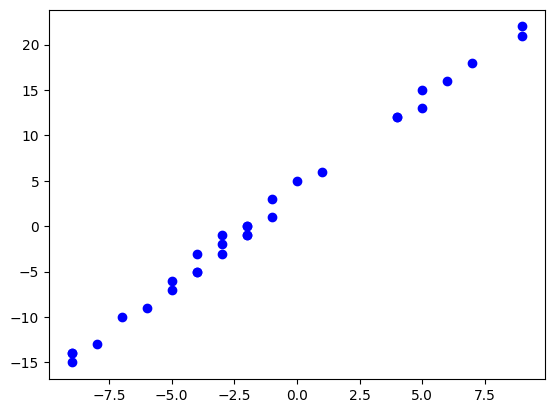

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt

w = 2
b = 3
xlim = [-10, 10]
x_train = np.random.randint(xlim[0], xlim[1], size=30)
y_train = [w*x+b + random.randint(0,2) for x in x_train]

plt.plot(x_train, y_train, 'bo')

In [3]:
import torch
from torch import nn

class LinearModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))
    
    def forward(self, input):
        return (input * self.weight) + self.bias


model = LinearModel()
x = torch.tensor(3)
y = model(x)
print(x)
print(y)

optimizer = torch.optim.SGD(model.parameters(), 1e-4, weight_decay=1e-2, momentum=0.9)

y_train = torch.tensor(y_train, dtype=torch.float32)
for _ in range(1000):
    input = torch.from_numpy(x_train)
    output = model(input)
    loss = nn.MSELoss()(output, y_train)
    model.zero_grad()
    loss.backward()
    optimizer.step()

for param in model.named_parameters():
    print(param)

tensor(3)
tensor([-2.4263], grad_fn=<AddBackward0>)
('weight', Parameter containing:
tensor([1.9964], requires_grad=True))
('bias', Parameter containing:
tensor([3.2526], requires_grad=True))


In [8]:
# save and load
torch.save(model.state_dict(), './lesson14-model-state-only.pth')

torch.save(model, './lesson14-model.pth')

linearModel = torch.load('./lesson14-model.pth')
linearModel.eval()

for param in linearModel.named_parameters():
    print(param)

('weight', Parameter containing:
tensor([1.9964], requires_grad=True))
('bias', Parameter containing:
tensor([3.2526], requires_grad=True))
